In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_half_hour=pd.read_csv('asos.csv')
df_half_hour = df_half_hour[df_half_hour['tmpf'] <= 120]
df_half_hour.isna().sum()

valid       0
tmpf        0
dwpf       45
relh      227
drct     1123
alti      170
vsby      483
feel      326
dtype: int64

In [3]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,alti,vsby,feel
0,2/21/2002 6:00,55.4,39.2,54.34,0.0,29.91,6.21,55.4
1,2/21/2002 6:30,55.4,39.2,54.34,0.0,29.94,6.21,55.4
2,2/21/2002 7:00,59.0,42.8,54.86,60.0,29.94,3.73,59.0
3,2/21/2002 7:30,59.0,42.8,54.86,60.0,29.94,3.73,59.0
4,2/21/2002 8:00,62.6,42.8,48.28,60.0,29.94,2.49,62.6
...,...,...,...,...,...,...,...,...
504725,10/16/2024 22:00,78.8,51.8,39.02,150.0,29.94,6.21,78.8
504726,10/16/2024 22:00,75.2,64.4,69.14,10.0,29.97,6.21,75.2
504727,10/16/2024 22:30,75.2,64.4,69.14,10.0,29.97,6.21,75.2
504728,10/16/2024 23:00,75.2,64.4,69.14,10.0,29.97,6.21,75.2


In [4]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column for easier grouping
filter_df['date'] = filter_df['valid'].dt.date

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby('date')['tmpf'].idxmax()].reset_index(drop=True)

# Inspect the result
daily_max_temp.drop(columns=['valid'],inplace=True)
daily_max_temp


,tmpf,dwpf,relh,drct,alti,vsby,feel,date
0,75.2,26.6,16.43,230.0,29.91,4.97,75.20,2002-02-21
1,73.4,51.8,46.71,30.0,30.12,6.21,73.40,2003-01-01
2,73.4,41.0,31.05,10.0,30.06,6.21,73.40,2003-01-02
3,69.8,42.8,37.61,310.0,30.12,6.21,69.80,2003-01-03
4,71.6,46.4,40.57,360.0,30.15,6.21,71.60,2003-01-04
...,...,...,...,...,...,...,...,...
5783,98.6,48.2,18.25,330.0,29.83,6.21,95.17,2024-10-12
5784,100.4,44.6,15.08,250.0,29.83,6.21,96.31,2024-10-13
5785,102.2,37.4,10.81,300.0,29.77,6.21,96.63,2024-10-14
5786,102.2,46.4,15.30,360.0,29.85,6.21,98.43,2024-10-15


In [5]:
daily_max_temp['temp_c'] = (daily_max_temp['tmpf'] - 32) * 5/9

# Drop the old column if needed
daily_max_temp.drop(columns=['tmpf'], inplace=True)

daily_max_temp

,dwpf,relh,drct,alti,vsby,feel,date,temp_c
0,26.6,16.43,230.0,29.91,4.97,75.20,2002-02-21,24.0
1,51.8,46.71,30.0,30.12,6.21,73.40,2003-01-01,23.0
2,41.0,31.05,10.0,30.06,6.21,73.40,2003-01-02,23.0
3,42.8,37.61,310.0,30.12,6.21,69.80,2003-01-03,21.0
4,46.4,40.57,360.0,30.15,6.21,71.60,2003-01-04,22.0
...,...,...,...,...,...,...,...,...
5783,48.2,18.25,330.0,29.83,6.21,95.17,2024-10-12,37.0
5784,44.6,15.08,250.0,29.83,6.21,96.31,2024-10-13,38.0
5785,37.4,10.81,300.0,29.77,6.21,96.63,2024-10-14,39.0
5786,46.4,15.30,360.0,29.85,6.21,98.43,2024-10-15,39.0


In [6]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp

90th Percentile of max_temp_c: 43.0


,dwpf,relh,drct,alti,vsby,feel,date,temp_c
0,26.6,16.43,230.0,29.91,4.97,75.20,2002-02-21,24.0
1,51.8,46.71,30.0,30.12,6.21,73.40,2003-01-01,23.0
2,41.0,31.05,10.0,30.06,6.21,73.40,2003-01-02,23.0
3,42.8,37.61,310.0,30.12,6.21,69.80,2003-01-03,21.0
4,46.4,40.57,360.0,30.15,6.21,71.60,2003-01-04,22.0
...,...,...,...,...,...,...,...,...
5783,48.2,18.25,330.0,29.83,6.21,95.17,2024-10-12,37.0
5784,44.6,15.08,250.0,29.83,6.21,96.31,2024-10-13,38.0
5785,37.4,10.81,300.0,29.77,6.21,96.63,2024-10-14,39.0
5786,46.4,15.30,360.0,29.85,6.21,98.43,2024-10-15,39.0


In [7]:
daily_max_temp.isna().sum()

dwpf       0
relh       2
drct      15
alti       9
vsby      14
feel       2
date       0
temp_c     0
dtype: int64

In [8]:
daily_max_temp = daily_max_temp.ffill() 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      0
alti      0
vsby      0
feel      0
date      0
temp_c    0
dtype: int64

In [9]:
daily_max_temp['date'] = pd.to_datetime(daily_max_temp['date'])

daily_max_temp = daily_max_temp[(daily_max_temp['date'] >= pd.to_datetime('2010-01-01')) & (daily_max_temp['date'] <= pd.to_datetime('2024-10-21'))]

daily_max_temp

,dwpf,relh,drct,alti,vsby,feel,date,temp_c
386,51.8,41.42,200.0,30.06,6.21,77.00,2010-01-01,25.0
387,46.4,33.85,230.0,30.00,1.86,75.99,2010-01-02,25.0
388,53.6,53.03,280.0,30.03,6.21,71.60,2010-01-03,22.0
389,53.6,59.97,280.0,30.09,6.21,68.00,2010-01-04,20.0
390,50.0,49.37,40.0,30.09,6.21,69.80,2010-01-05,21.0
...,...,...,...,...,...,...,...,...
5783,48.2,18.25,330.0,29.83,6.21,95.17,2024-10-12,37.0
5784,44.6,15.08,250.0,29.83,6.21,96.31,2024-10-13,38.0
5785,37.4,10.81,300.0,29.77,6.21,96.63,2024-10-14,39.0
5786,46.4,15.30,360.0,29.85,6.21,98.43,2024-10-15,39.0


In [10]:
df=daily_max_temp

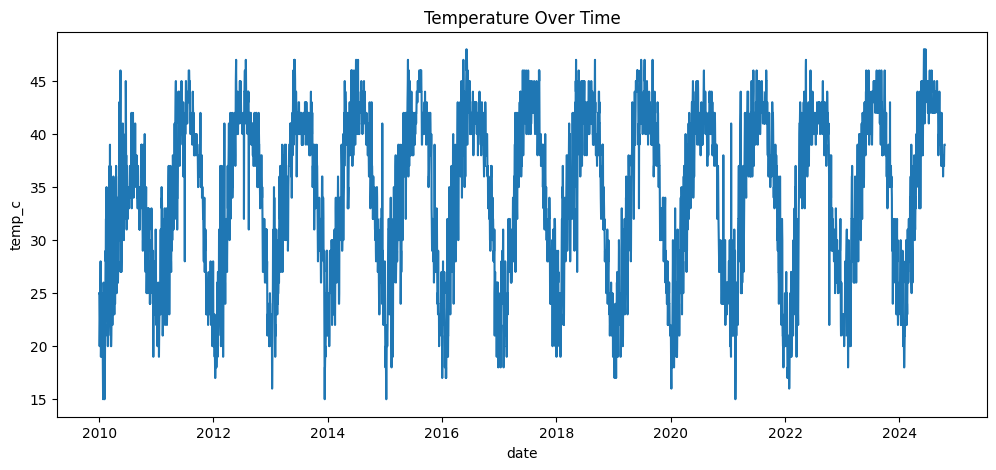

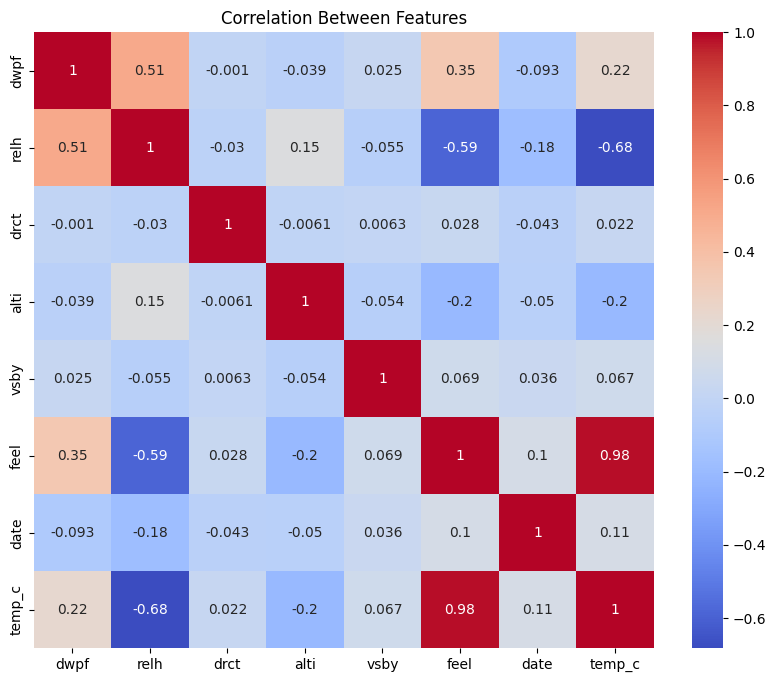

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Temperature trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='temp_c', data=df)
plt.title("Temperature Over Time")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


In [12]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Create useful time columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour

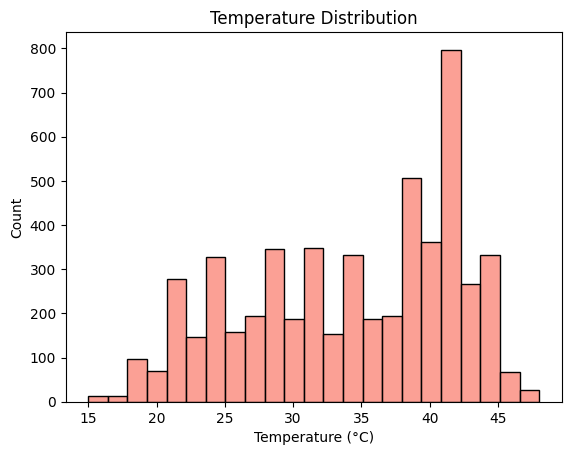

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and 'temp_c' is the temperature column
sns.histplot(data=df, x='temp_c', kde=False, color='salmon', edgecolor='black')

plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_17932\2633976979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')


Text(0, 0.5, 'Temperature (°C)')

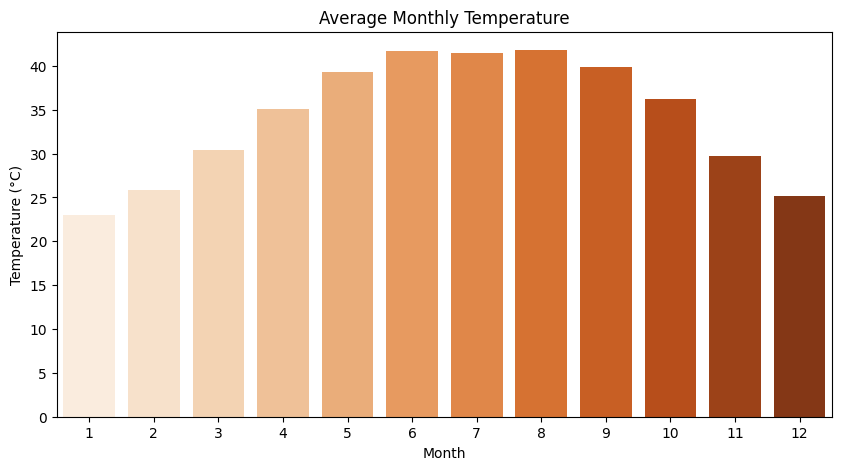

In [14]:
monthly_temp = df.groupby('month')['temp_c'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")


Text(0.5, 1.0, 'Average Maximum Temperature (°C) Month')

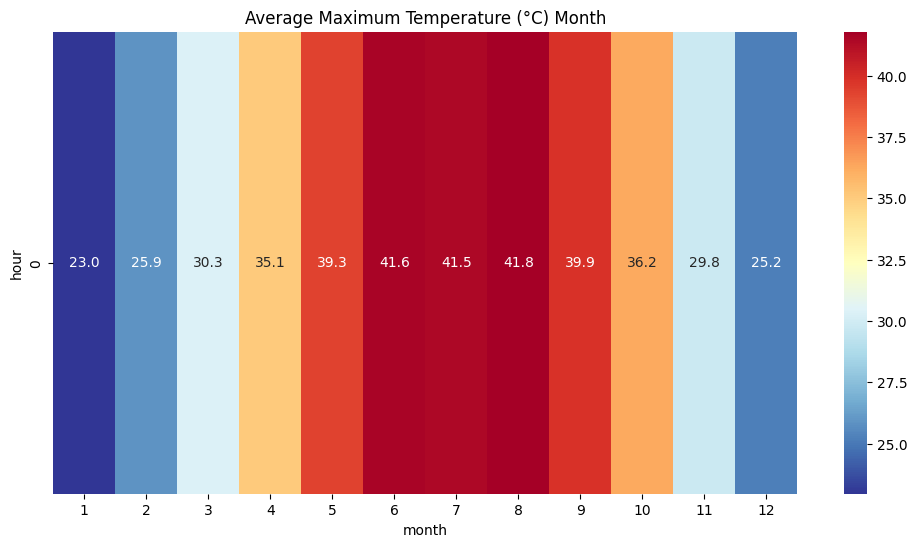

In [15]:
pivot_table = df.pivot_table(index='hour', columns='month', values='temp_c', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="RdYlBu_r", annot=True, fmt=".1f")
plt.title("Average Maximum Temperature (°C) Month")

Number of days with large temperature change (> 5°C): 217


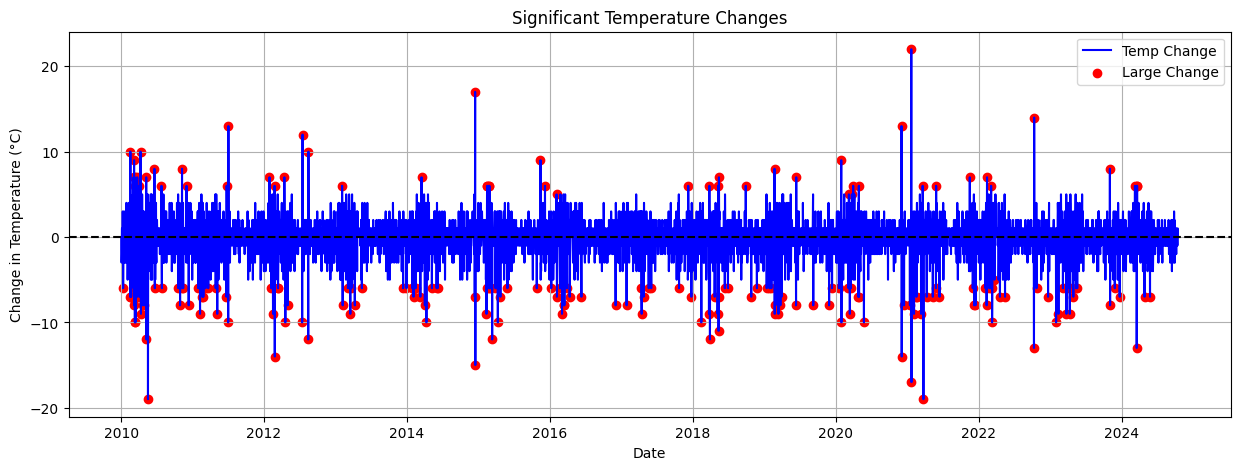

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily temperature change
df['temp_change'] = df['temp_c'].diff()

# Define threshold, e.g., >5°C change
threshold = 5

# Filter days with large absolute temperature change
large_change = df[np.abs(df['temp_change']) > threshold]

# Print number of large change days
print("Number of days with large temperature change (> 5°C):", len(large_change))

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['temp_change'], label="Temp Change", color='blue')
plt.scatter(large_change['date'], large_change['temp_change'], color='red', label='Large Change')
plt.axhline(0, color='black', linestyle='--')
plt.title("Significant Temperature Changes")
plt.xlabel("Date")
plt.ylabel("Change in Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
